## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman3Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 1
bias = 1


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1

In [6]:
X,Y = friedman3Dataset.friedman3_data(n_samples)

          X1           X2        X3        X4         Y
0  32.156352   558.708699  0.513189  9.069784  1.444208
1  17.830167   811.810675  0.961619  6.850242  1.619892
2  10.851227  1576.011209  0.871104  1.744922  1.454965
3  94.544568   601.718880  0.745465  2.075786  1.533254
4  34.357390   729.244709  0.827301  6.789218  1.635543


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 1.0583508	total: 69.6ms	remaining: 1m 9s
1:	learn: 1.0501975	total: 70.3ms	remaining: 35.1s
2:	learn: 1.0398423	total: 71ms	remaining: 23.6s
3:	learn: 1.0298756	total: 71.4ms	remaining: 17.8s
4:	learn: 1.0186629	total: 71.9ms	remaining: 14.3s
5:	learn: 1.0092652	total: 72.4ms	remaining: 12s
6:	learn: 0.9993345	total: 72.8ms	remaining: 10.3s
7:	learn: 0.9868394	total: 73.3ms	remaining: 9.09s
8:	learn: 0.9757261	total: 73.7ms	remaining: 8.12s
9:	learn: 0.9639873	total: 74.2ms	remaining: 7.34s
10:	learn: 0.9562866	total: 74.6ms	remaining: 6.71s
11:	learn: 0.9452967	total: 75.1ms	remaining: 6.18s
12:	learn: 0.9356504	total: 75.4ms	remaining: 5.73s
13:	learn: 0.9273639	total: 75.9ms	remaining: 5.34s
14:	learn: 0.9171186	total: 76.3ms	remaining: 5.01s
15:	learn: 0.9090199	total: 76.9ms	remaining: 4.73s
16:	learn: 0.8996068	total: 77.3ms	remaining: 4.47s
17:	learn: 0.8921095	total: 77.7ms	remaining: 4.24s
18:	learn: 0.8854658	total: 78ms	remaining: 4.03

85:	learn: 0.4989298	total: 107ms	remaining: 1.14s
86:	learn: 0.4954213	total: 108ms	remaining: 1.13s
87:	learn: 0.4918976	total: 109ms	remaining: 1.13s
88:	learn: 0.4889402	total: 109ms	remaining: 1.11s
89:	learn: 0.4854418	total: 109ms	remaining: 1.1s
90:	learn: 0.4822271	total: 110ms	remaining: 1.09s
91:	learn: 0.4793237	total: 110ms	remaining: 1.09s
92:	learn: 0.4760923	total: 111ms	remaining: 1.08s
93:	learn: 0.4724788	total: 111ms	remaining: 1.07s
94:	learn: 0.4683082	total: 111ms	remaining: 1.06s
95:	learn: 0.4643076	total: 112ms	remaining: 1.05s
96:	learn: 0.4603443	total: 112ms	remaining: 1.04s
97:	learn: 0.4565107	total: 112ms	remaining: 1.03s
98:	learn: 0.4529051	total: 113ms	remaining: 1.03s
99:	learn: 0.4500403	total: 113ms	remaining: 1.02s
100:	learn: 0.4461081	total: 114ms	remaining: 1.01s
101:	learn: 0.4442236	total: 114ms	remaining: 1s
102:	learn: 0.4412398	total: 114ms	remaining: 996ms
103:	learn: 0.4380427	total: 115ms	remaining: 989ms
104:	learn: 0.4347495	total: 11

268:	learn: 0.1769919	total: 186ms	remaining: 505ms
269:	learn: 0.1766259	total: 186ms	remaining: 504ms
270:	learn: 0.1756230	total: 187ms	remaining: 503ms
271:	learn: 0.1748517	total: 187ms	remaining: 501ms
272:	learn: 0.1738826	total: 187ms	remaining: 499ms
273:	learn: 0.1732190	total: 188ms	remaining: 498ms
274:	learn: 0.1728675	total: 188ms	remaining: 496ms
275:	learn: 0.1725324	total: 189ms	remaining: 495ms
276:	learn: 0.1719886	total: 189ms	remaining: 493ms
277:	learn: 0.1710579	total: 189ms	remaining: 492ms
278:	learn: 0.1705039	total: 190ms	remaining: 490ms
279:	learn: 0.1694627	total: 190ms	remaining: 489ms
280:	learn: 0.1684916	total: 190ms	remaining: 487ms
281:	learn: 0.1677993	total: 191ms	remaining: 486ms
282:	learn: 0.1674664	total: 191ms	remaining: 485ms
283:	learn: 0.1671735	total: 192ms	remaining: 484ms
284:	learn: 0.1665786	total: 192ms	remaining: 482ms
285:	learn: 0.1661372	total: 192ms	remaining: 480ms
286:	learn: 0.1658189	total: 193ms	remaining: 479ms
287:	learn: 

508:	learn: 0.0924187	total: 289ms	remaining: 279ms
509:	learn: 0.0920143	total: 290ms	remaining: 278ms
510:	learn: 0.0917092	total: 290ms	remaining: 278ms
511:	learn: 0.0913148	total: 291ms	remaining: 277ms
512:	learn: 0.0909276	total: 291ms	remaining: 276ms
513:	learn: 0.0905474	total: 292ms	remaining: 276ms
514:	learn: 0.0902112	total: 292ms	remaining: 275ms
515:	learn: 0.0898393	total: 293ms	remaining: 275ms
516:	learn: 0.0895517	total: 293ms	remaining: 274ms
517:	learn: 0.0891393	total: 294ms	remaining: 273ms
518:	learn: 0.0888120	total: 294ms	remaining: 273ms
519:	learn: 0.0884491	total: 295ms	remaining: 272ms
520:	learn: 0.0881680	total: 295ms	remaining: 271ms
521:	learn: 0.0877705	total: 296ms	remaining: 271ms
522:	learn: 0.0874503	total: 296ms	remaining: 270ms
523:	learn: 0.0871487	total: 297ms	remaining: 270ms
524:	learn: 0.0869741	total: 297ms	remaining: 269ms
525:	learn: 0.0867076	total: 297ms	remaining: 268ms
526:	learn: 0.0864129	total: 298ms	remaining: 267ms
527:	learn: 

693:	learn: 0.0524225	total: 368ms	remaining: 162ms
694:	learn: 0.0522647	total: 368ms	remaining: 162ms
695:	learn: 0.0521095	total: 369ms	remaining: 161ms
696:	learn: 0.0518956	total: 369ms	remaining: 160ms
697:	learn: 0.0517559	total: 369ms	remaining: 160ms
698:	learn: 0.0517084	total: 370ms	remaining: 159ms
699:	learn: 0.0513804	total: 370ms	remaining: 159ms
700:	learn: 0.0512438	total: 370ms	remaining: 158ms
701:	learn: 0.0511440	total: 371ms	remaining: 157ms
702:	learn: 0.0509880	total: 371ms	remaining: 157ms
703:	learn: 0.0508510	total: 372ms	remaining: 156ms
704:	learn: 0.0506975	total: 372ms	remaining: 156ms
705:	learn: 0.0504689	total: 373ms	remaining: 155ms
706:	learn: 0.0503376	total: 373ms	remaining: 155ms
707:	learn: 0.0502091	total: 374ms	remaining: 154ms
708:	learn: 0.0500587	total: 374ms	remaining: 154ms
709:	learn: 0.0499075	total: 375ms	remaining: 153ms
710:	learn: 0.0497909	total: 375ms	remaining: 152ms
711:	learn: 0.0496653	total: 376ms	remaining: 152ms
712:	learn: 

928:	learn: 0.0266225	total: 471ms	remaining: 36ms
929:	learn: 0.0265151	total: 471ms	remaining: 35.5ms
930:	learn: 0.0264702	total: 472ms	remaining: 35ms
931:	learn: 0.0264145	total: 472ms	remaining: 34.5ms
932:	learn: 0.0263701	total: 473ms	remaining: 33.9ms
933:	learn: 0.0263063	total: 473ms	remaining: 33.4ms
934:	learn: 0.0262587	total: 473ms	remaining: 32.9ms
935:	learn: 0.0262152	total: 474ms	remaining: 32.4ms
936:	learn: 0.0261610	total: 474ms	remaining: 31.9ms
937:	learn: 0.0261144	total: 475ms	remaining: 31.4ms
938:	learn: 0.0260496	total: 475ms	remaining: 30.9ms
939:	learn: 0.0260069	total: 476ms	remaining: 30.4ms
940:	learn: 0.0259614	total: 476ms	remaining: 29.8ms
941:	learn: 0.0259164	total: 476ms	remaining: 29.3ms
942:	learn: 0.0258533	total: 477ms	remaining: 28.8ms
943:	learn: 0.0258118	total: 477ms	remaining: 28.3ms
944:	learn: 0.0257709	total: 478ms	remaining: 27.8ms
945:	learn: 0.0257143	total: 478ms	remaining: 27.3ms
946:	learn: 0.0256740	total: 479ms	remaining: 26.8

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

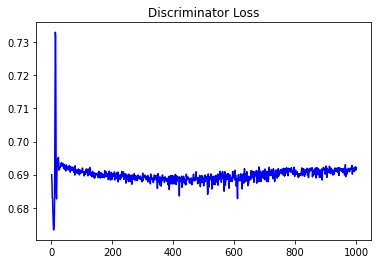

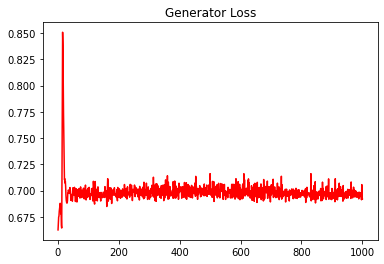

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.25098495904926355


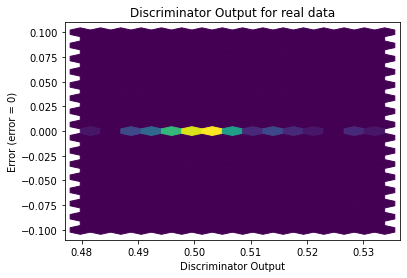

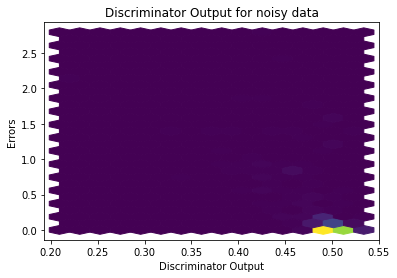

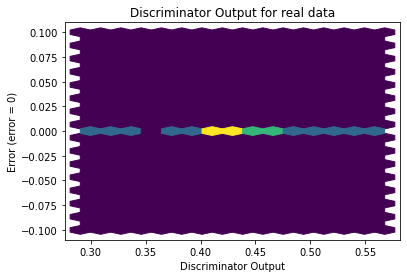

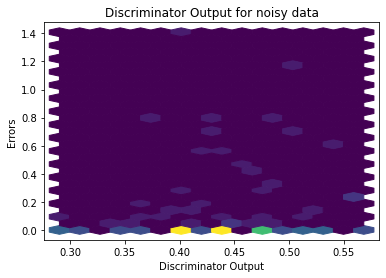

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


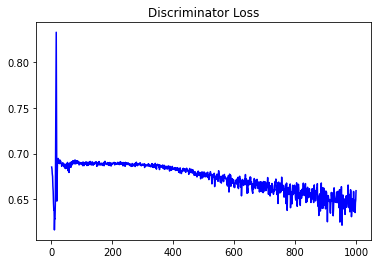

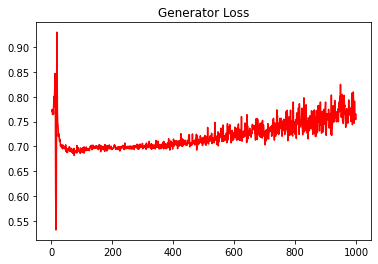

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.3307193373610266


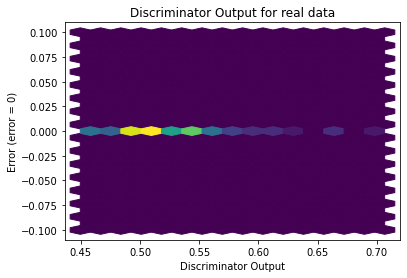

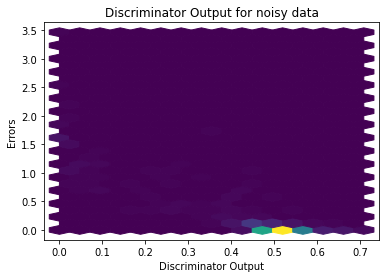

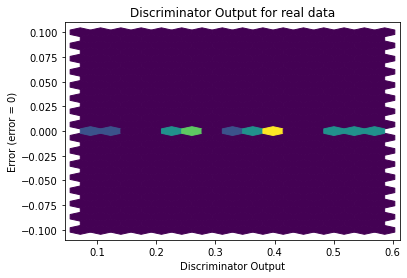

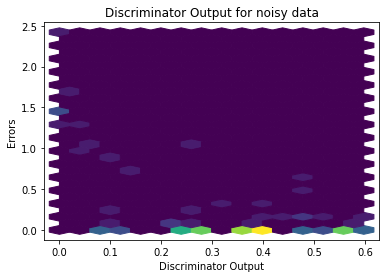

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.1211]], requires_grad=True)
